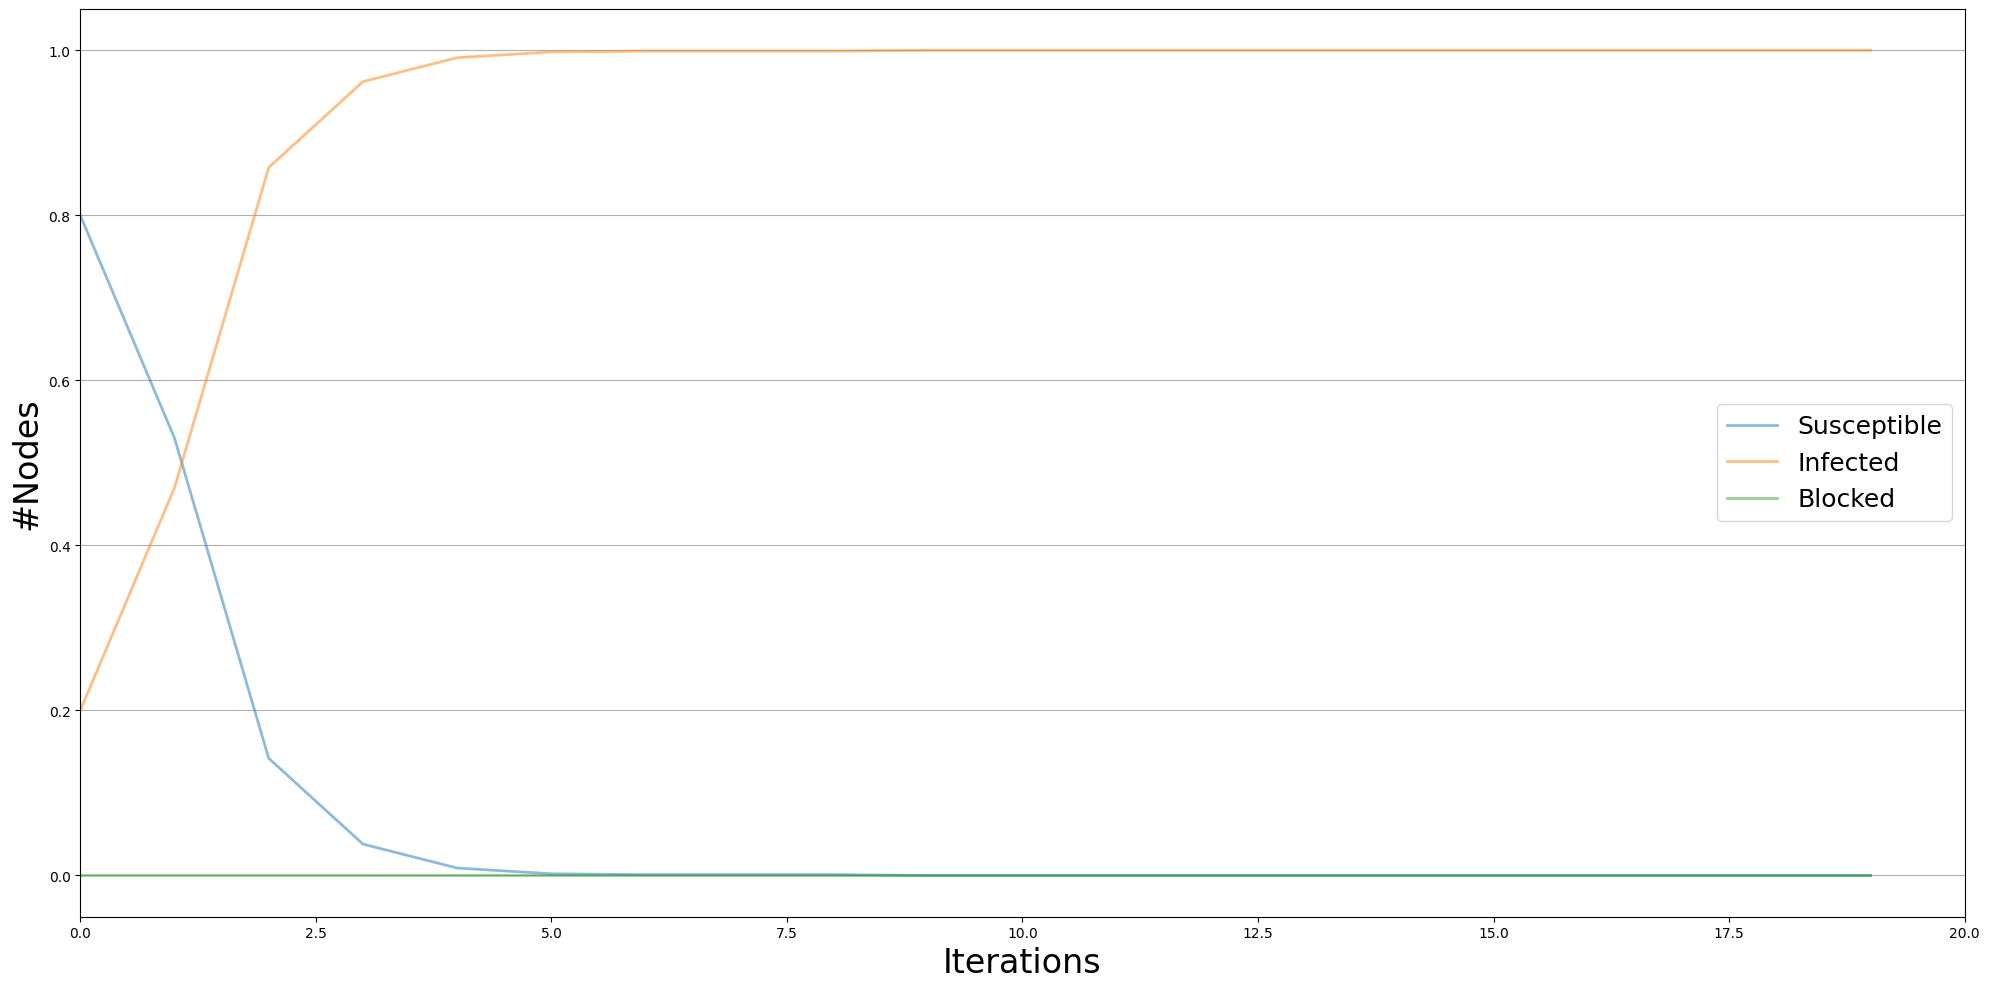

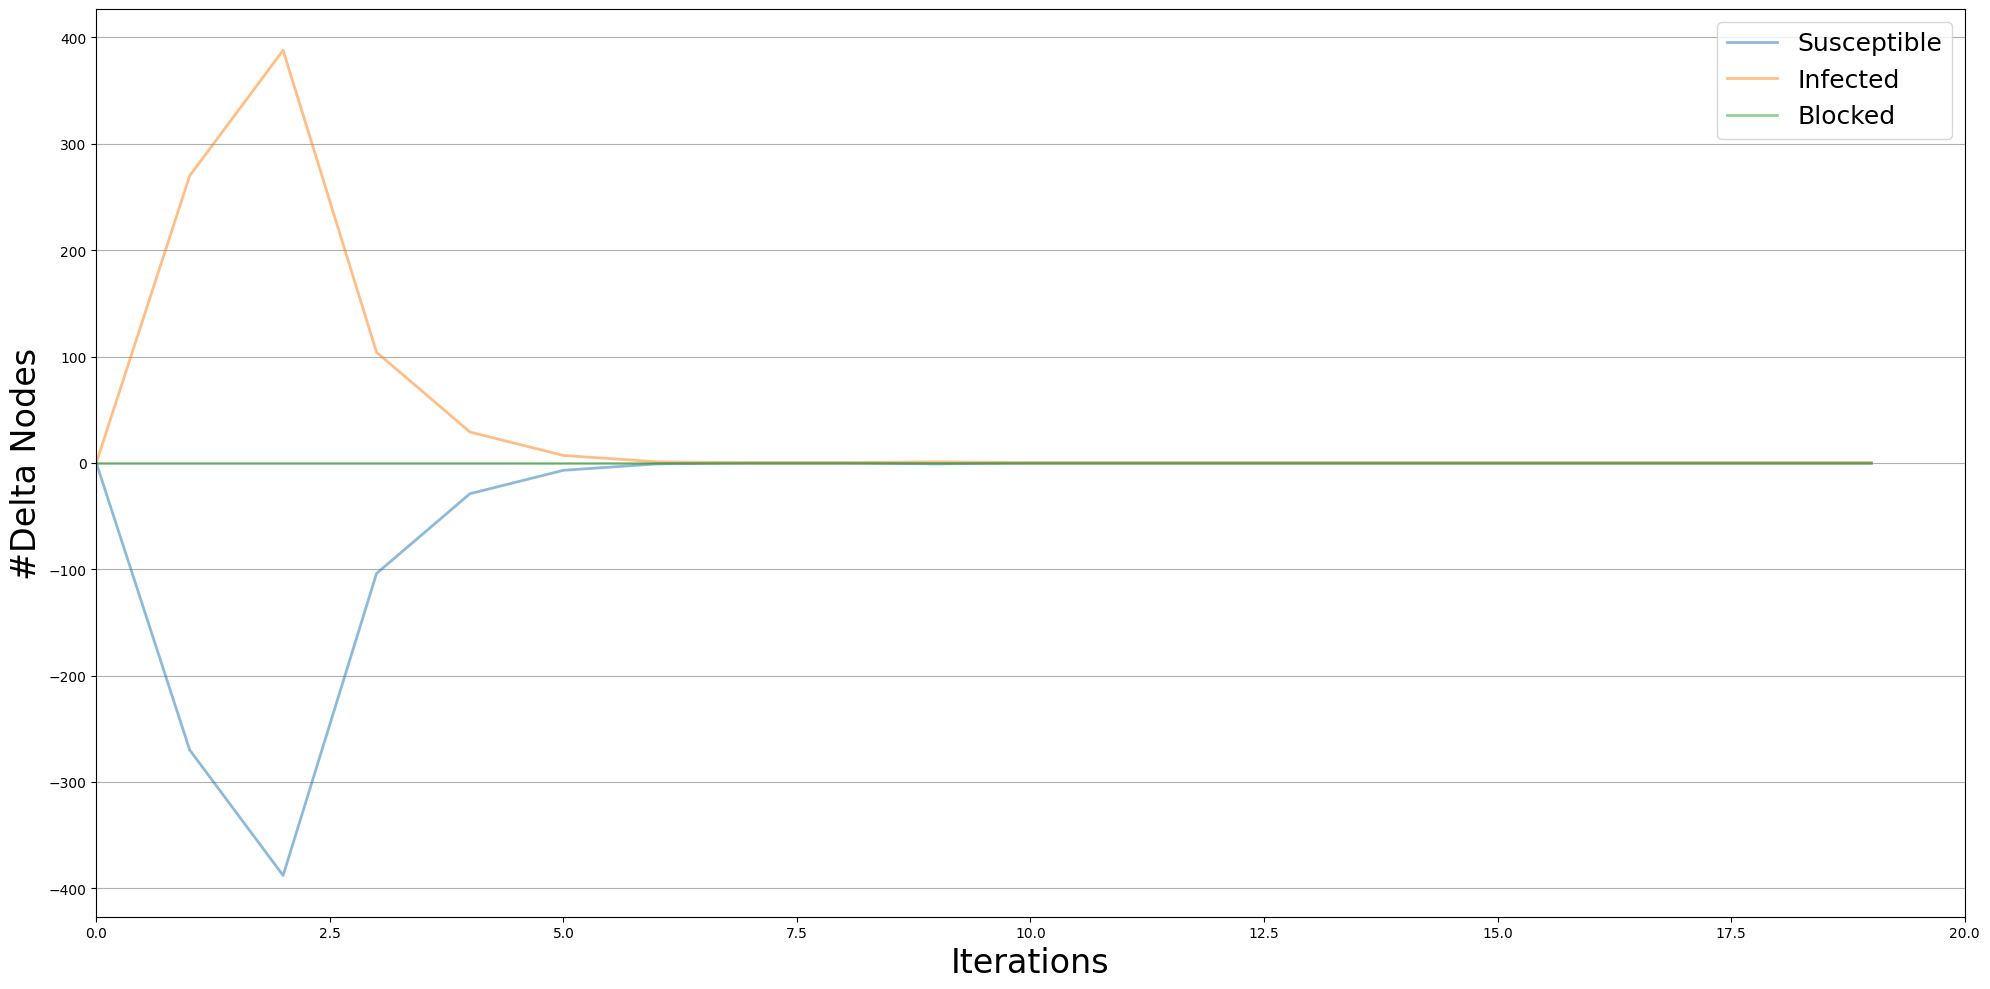

In [19]:
'''
The Profile-Threshold model assumes the existence of node profiles that act as preferential schemas for individual tastes but relax the constraints imposed by the Profile model by letting nodes influenceable via peer pressure mechanisms.

The peer pressure is modeled with a threshold.

The diffusion process starts from a set of nodes that have already adopted a given behaviour S:

for each of the susceptible node an unbalanced coin is flipped if the percentage of its neighbors that are already infected excedes its threhosld. As in the Profile Model the coin unbalance is given by the personal profile of the susceptible node;
if a positive result is obtained the susceptible node will adopt the behaviour, thus becoming infected.
if the blocked status is enabled, after having rejected the adoption with probability blocked a node becomes immune to the infection.
every iteration adopter_rate percentage of nodes spontaneous became infected to endogenous effects.

Statuses;
- 0: Suscptible
- 1: Infected
- 2: Blocked

Parameters:
- blocked: The probability that a node will block the adoption of the behavior
- adopter_rate: The percentage of nodes that will adopt the behavior independently from the profile at each iteration
- threshold: The threshold that a node needs to be infected in order to adopt the behavior
- profile: The profile of the nodes, this is a value between 0 and 1 that represents the probability that a node will adopt the behavior
- fraction_infected: The fraction of initially infected nodes

Prendo ogni nodo susceptible, se il numero di vicini infetti è maggiore del threshold del nodo, allora lancio una moneta con bias pari al profilo del nodo. Se la moneta esce testa, il nodo diventa infetto. Infine, ad ogni iterazione, un numero di nodi pari ad adopter_rate diventa infetto indipendentemente dal profilo.

N.B la differenza tra adopter_rate e profile è che il primo indica una percentuale di nodi che diventeranno infetti ad ogni iterazione a prescindere dal valore per profile, mentre il secondo indica la probabilità ad ogni iterazione che un nodo diventi infetto se il numero di vicini infetti supera il threshold.

'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ProfileThresholdModel(g)
config = mc.Configuration()
config.add_model_parameter('blocked', 0)
config.add_model_parameter('adopter_rate', 0)
config.add_model_parameter('fraction_infected', 0.1)

# Setting nodes parameters
threshold = 0.15
profile = 0.25  #inverted like in the Profile Model
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    config.add_node_configuration("profile", i, profile)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)


%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()